In [2]:
from sklearn.feature_extraction.text import CountVectorizer
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
sns.set_style('whitegrid')
%matplotlib inline

In [3]:
#reading in dataset 
posts = pd.read_csv('../data/processed/cleaned_reddit_data.csv')

posts.head()

,Unnamed: 0,selftext,title,time_created,processed_text,processed_title
0,0,"Hi all, hoping for some advise here. \n\nWe ar...",Changing insurance mid year?,2020-11-20 04:38:11,hi hoping advise currently wife's insurance (c...,changing insurance mid year
1,1,It's my time picking out insurance and dealing...,PPO or CDHP as a person with a chronic disease?,2020-11-20 04:19:00,time picking insurance dealing premiums deduct...,ppo cdhp person chronic disease
2,2,I am wondering about the implications of answe...,How to answer questions about an injury/worker...,2020-11-20 04:08:32,wondering implications answering questionnaire...,answer questions injury/workers comp
3,3,I had spoken with someone over the phone with ...,Misinformed by my insurance,2020-11-20 03:07:41,spoken someone phone anthem (my insurance prov...,misinformed insurance
4,4,Can anyone provide me any information about th...,Blue Cross vs Cigna,2020-11-20 01:56:38,anyone provide information cigna connect 700-4...,blue cross vs cigna


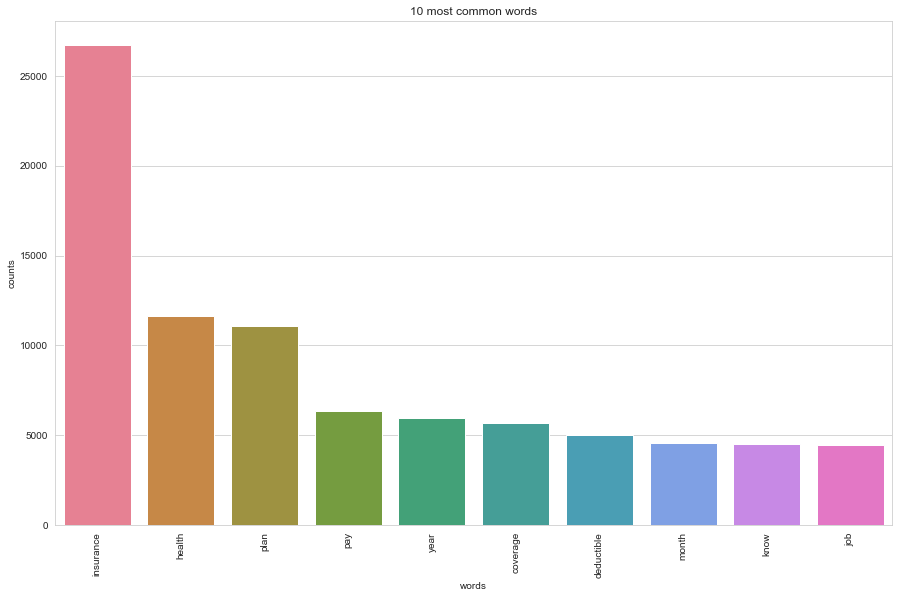

In [5]:
# Helper function
def plot_10_most_common_words(count_data, count_vectorizer):
    import matplotlib.pyplot as plt
    words = count_vectorizer.get_feature_names()
    total_counts = np.zeros(len(words))
    for t in count_data:
        total_counts+=t.toarray()[0]
    
    count_dict = (zip(words, total_counts))
    count_dict = sorted(count_dict, key=lambda x:x[1], reverse=True)[0:10]
    words = [w[0] for w in count_dict]
    counts = [w[1] for w in count_dict]
    x_pos = np.arange(len(words)) 
    
    plt.figure(2, figsize=(15, 15/1.6180))
    plt.subplot(title='10 most common words')
    sns.set_context("notebook", font_scale=1.25, rc={"lines.linewidth": 2.5})
    sns.barplot(x_pos, counts, palette='husl')
    plt.xticks(x_pos, words, rotation=90) 
    plt.xlabel('words')
    plt.ylabel('counts')
    plt.show()
    
# Initialise the count vectorizer with the English stop words
count_vectorizer = CountVectorizer(stop_words='english')

# Fit and transform the processed titles
count_data = count_vectorizer.fit_transform(posts['processed_text'])

# Visualise the 10 most common words
plot_10_most_common_words(count_data, count_vectorizer)

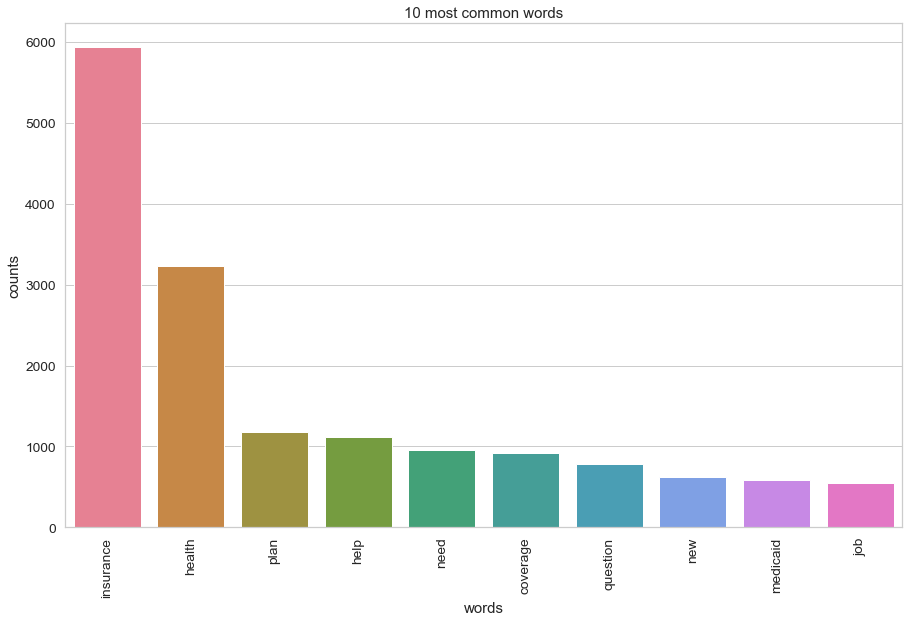

In [6]:
# Fit and transform the processed titles
count_data = count_vectorizer.fit_transform(posts['processed_title'])

# Visualise the 10 most common words
plot_10_most_common_words(count_data, count_vectorizer)

In [7]:
import warnings
warnings.simplefilter("ignore", DeprecationWarning)# Load the LDA model from sk-learn
from sklearn.decomposition import LatentDirichletAllocation as LDA

# Helper function
def print_topics(model, count_vectorizer, n_top_words):
    words = count_vectorizer.get_feature_names()
    for topic_idx, topic in enumerate(model.components_):
        print("\nTopic #%d:" % topic_idx)
        print(" ".join([words[i]
                        for i in topic.argsort()[:-n_top_words - 1:-1]]))

In [16]:
# Tweak the two parameters below
number_topics = 5
number_words = 10

topics = [5, 10, 20, 50, 100]

for topic in topics:
    # Create and fit the LDA mode;
    print('With {} number of topics'.format(str(topic)))
    lda = LDA(n_components = topic, n_jobs=-1)
    lda.fit(count_data)
    
    # Print the topics found by the LDA model
    print("Topics found via LDA:")
    print_topics(lda, count_vectorizer, number_words)
    print('/n')

With 5 number of topics
Topics found via LDA:

Topic #0:
deductible insurance plan network pay pocket hospital care cost doctor

Topic #1:
insurance health medicaid plan income year time know parents help

Topic #2:
insurance health know need doctor years cover work want help

Topic #3:
insurance said told company doctor called got covered office pay

Topic #4:
insurance plan health coverage job year month employer new plans
/n
With 10 number of topics
Topics found via LDA:

Topic #0:
deductible plan pocket pay network max 20 copay coinsurance care

Topic #1:
plan year deductible insurance month plans hsa employer health pay

Topic #2:
insurance health plan coverage job income year employer new enrollment

Topic #3:
insurance health medicaid time know parents job plan help work

Topic #4:
insurance company letter surgery claim said received called medical told

Topic #5:
insurance network hospital doctor provider pay office said company told

Topic #6:
insurance health pay year company

In [19]:
from textblob import TextBlob
import nltk, re, string, collections
from nltk.util import ngrams

In [20]:
text = ' '.join(posts['processed_text'])
blob = TextBlob(text)

#get individual words
tokenized = blob.split()

#get the frequency of each bigram
Bigrams = ngrams(tokenized, 2)
BigramFreq = collections.Counter(Bigrams)

l = BigramFreq.most_common(10)
l

[(('health', 'insurance'), 7543),
 (('insurance', 'company'), 1924),
 (('insurance', 'plan'), 1139),
 (('open', 'enrollment'), 1016),
 (('new', 'job'), 913),
 (('blue', 'cross'), 664),
 (('health', 'care'), 647),
 (('last', 'year'), 621),
 (("i'm", 'sure'), 533),
 (('blue', 'shield'), 515)]